In [1]:
import warnings
warnings.simplefilter('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

https://stackoverflow.com/questions/35595766/matplotlib-line-magic-causes-syntaxerror-in-python-script

Line magics are only supported by the IPython command line. They cannot simply be used inside a script, because %something is not correct Python syntax.

行魔术仅由 IPython 命令行支持。 它们不能简单地在脚本中使用，因为% something 不是正确的 Python 语法。

If you want to do this from a script you have to get access to the IPython API and then call the run_line_magic function.

如果您想从脚本中执行此操作，必须获得对 IPython API 的访问权，然后调用运行行魔术函数。

Instead of %matplotlib inline, you will have to do something like this in your script:

代替% matplotlib inline，你必须在你的脚本中做这样的事情:

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import numpy as np
import pandas as pd

In [3]:
sd1_closed = pd.read_excel(io = 'D:\lunwen\\sd1_closed.xls')



In [4]:
print (sd1_closed.head(3))

date   closes1   closed1
0 2017-12-26  0.770714 -0.031710
1 2017-12-27 -0.917752  0.113512
2 2017-12-28  0.628920  0.255139


In [5]:
print(type(sd1_closed))

<class 'pandas.core.frame.DataFrame'>


In [6]:
sd1_closed.columns = ['date','closes1','closed1']

In [7]:
sd1_closed['date'] = pd.to_datetime(sd1_closed['date'])
sd1_closed = sd1_closed.set_index('date')


In [8]:
print(sd1_closed['closes1'].head(3))

date
2017-12-26    0.770714
2017-12-27   -0.917752
2017-12-28    0.628920
Name: closes1, dtype: float64


In [9]:
sd1_closed.loc['2018-3-22']

closes1   -0.532526
closed1   -2.934976
Name: 2018-03-22 00:00:00, dtype: float64

#将date设置为index

In [10]:
from arch.univariate import arch_model

In [11]:
am_s1 = arch_model(sd1_closed['closes1'])

arch_model 默认即为GARCH（1，1）
https://arch.readthedocs.io/en/latest/univariate/generated/generated/arch.univariate.base.ARCHModel.fit.html?highlight=fit
arch.arch_model(y: Union[numpy.ndarray, pandas.core.frame.DataFrame, pandas.core.series.Series, NoneType], x: Union[numpy.ndarray, pandas.core.frame.DataFrame, pandas.core.series.Series, NoneType] = None, mean: str = 'Constant', lags: Union[int, List[int], numpy.ndarray, NoneType] = 0, vol: str = 'Garch', p: Union[int, List[int]] = 1, o: int = 0, q: int = 1, power: float = 2.0, dist: str = 'Normal', hold_back: Union[int, NoneType] = None, rescale: Union[bool, NoneType] = None) → arch.univariate.mean.HARX

In [12]:
res_s1 = am_s1.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 74.86907181806342
Iteration:      2,   Func. Count:     14,   Neg. LLF: 74.30679169997484
Iteration:      3,   Func. Count:     21,   Neg. LLF: 74.15189685193585
Iteration:      4,   Func. Count:     29,   Neg. LLF: 74.12398216189905
Iteration:      5,   Func. Count:     36,   Neg. LLF: 74.00082502951662
Iteration:      6,   Func. Count:     43,   Neg. LLF: 73.99435938404967
Iteration:      7,   Func. Count:     50,   Neg. LLF: 73.98829630355377
Iteration:      8,   Func. Count:     56,   Neg. LLF: 73.98827018532765
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 73.98827018534769
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8


In [13]:
print(res_s1.summary())

Constant Mean - GARCH Model Results                      
Dep. Variable:                closes1   R-squared:                      -0.014
Mean Model:             Constant Mean   Adj. R-squared:                 -0.014
Vol Model:                      GARCH   Log-Likelihood:               -73.9883
Distribution:                  Normal   AIC:                           155.977
Method:            Maximum Likelihood   BIC:                           164.078
                                        No. Observations:                   56
Date:                Wed, Apr 22 2020   Df Residuals:                       52
Time:                        19:13:55   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1261      0.156      0.810      0.418 [ -0.179,  0.431]
                  

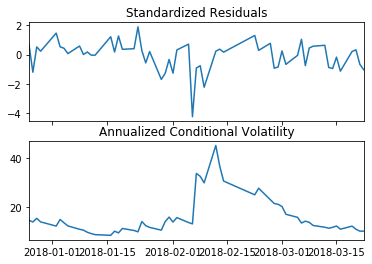

In [20]:
fig = res_s1.plot(annualize='D')

